### Estadística Inferencial con Python

La estadística es una ciencia que tiene un rol relevante en muchas disciplinas por ello conviene tener nociones básicas al respecto y mejor aún si se domina un software como Python para automatizar análisis estadísticos.

La estadística se clasifica en

        Estadística Descriptiva
        Estadística Inferencial

La estadística inferencial permite obtener conclusiones generales para una población mediante el análisis de una muestra. Dichas conclusiones además, van acompañadas de un nivel de significancia.

Para ello se realizan análisis de hipótesis que deben ser validadas mediante coeficientes o estadísticos, como es el caso de las pruebas de bondad de ajuste.

Para el análisis inferencial con Python se importarán los siguientes paquetes:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns

Las variables aleatorias, según sus características presentan diferentes distribuciones.
Cada tipo de distribución se define según ciertos estadísticos.
Por ejemplo la distribución normal se define con la media y la desviacion estandar.

En la siguiente celda "descomente" las líneas y observe las distribuciones uniforme, normal y exponencial.

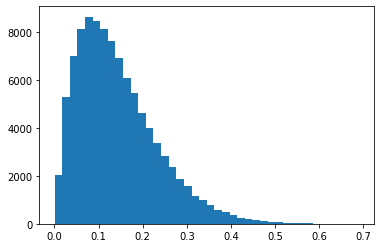

In [ ]:
# La función "np.random" permite obtener valores aleatorios según
# diferentes distribuciones estadísticas

# Con la función RandomState se mantiene el mismo estado aleatorio
r = np.random.RandomState(1234)

# en una variable uniforme la distribución es una recta horizontal
#values = r.uniform(0, 20.0, 1000000)
# en una distribucion uniforme los parametros son (inicio, fin, tamaño)

#values = r.normal(10, 2, 100000)
# en una distribución nomal los parámetros son (media, std, tamaño)

#values = r.exponential(5,10000)
# en una distribución exponencial los parámetros son (lambda, tamaño)

#values = r.weibull(100,50000)
# en una distribución de weibull los parámetros son (a, tamaño)

values = r.beta(2, 12, 100000)
# en una distribución beta los parámetros son(alpha, beta, tamaño)

plt.hist(values,40)
plt.show()

### Prueba de bondad de ajuste

Para sacar conclusiones a partir de una muestra se debe primero realizar una prueba de bondad de ajuste para identificar qué distribución estadística modela a los datos con suficiente significancia.

In [ ]:
# se utilizará la siguiente variable:
iris = pd.read_csv("https://raw.githubusercontent.com/toneloy/data/master/iris.csv")
var = iris["sepal_length"]

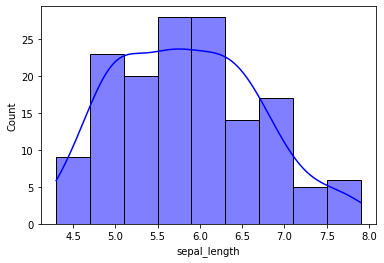

In [ ]:
sns.histplot(var,color="b", kde=True)
plt.show()

Al realizar un test se está realizando un análisis de hipótesis, estos análisis se caracterizan por presentar una hipótesis nula y una hipótesis alternativa.

    La hipótesis nula es: "la distribución de mi variable real se ajusta a la distribución ideal".
    La hipotesis alternativa es "la distribución de mi variable real no se ajusta a la distribución ideal".
    La prueba en Python arroja dos estadísticos, de estos dos el "pvalor" es el número más importante porque cuantifica la incertidumbre y permite aceptar o no la hipótesis nula. Con un p valor mayor a 0.05 se acepta la hipótesis nula

Se realiza con la función:
    
    stats.kstest(variable_normalizada,'norm')

Pero antes de realizar la prueba se debe normalizar la variable. Para ello se le resta la media y se divide entre la desviación estandar:

In [ ]:
media_var = var.mean()
std_var = var.std()
print(media_var, std_var)

5.843333333333334 0.828066127977863


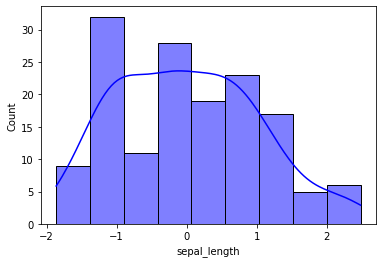

In [ ]:
var_norm=(var-media_var)/std_var
sns.histplot(var_norm,color="b", kde=True)
plt.show()

In [ ]:
# Test de bondad de ajuste
# stat.kstest(datos, distribucion)
stats.kstest(var_norm,'norm')

KstestResult(statistic=0.08865361377316228, pvalue=0.17813737848592026)

Con el resultado anterior de un pvalor = 0.178 se acepta la hipótesis nula y se puede utilizar la distribución normal ideal para obtener conclusiones.

A continuación se realizará el mismo procedimiento con otra variable

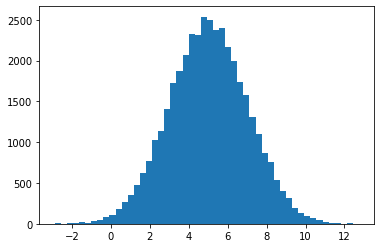

In [ ]:
# Se genera una distribución normal con una determinada media (mu)
# y desviacion (sigma)

mu = 5.0
sigma = 2.0
r = np.random.RandomState(1234)
var1 = r.normal(mu, sigma, 40000)
plt.hist(var1, 50)
plt.show()

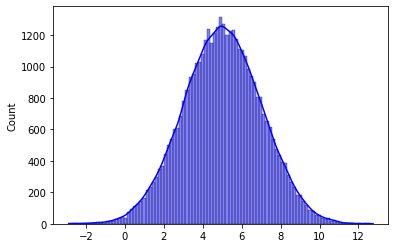

In [ ]:
sns.histplot(var1,color="b", kde = True)
plt.show()

In [ ]:
# ANTES DE HACER EL TEST SE NORMALIZA LA VARIABLE
# se resta la media y se divide entre la varianza
media_var1 = var1.mean()
std_var1 = var1.std()
print(media_var1, std_var1)

5.004153504473754 1.996845814310894


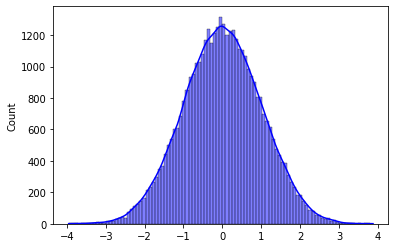

In [ ]:
# normalización de la data
var1_norm=(var1-media_var1)/std_var1
sns.histplot(var1_norm,color="b", kde=True)
plt.show()

In [ ]:
# Test de bondad de ajuste
# stat.kstest(datos, distribucion)
stats.kstest(var1_norm,'norm')

KstestResult(statistic=0.0026256493486620514, pvalue=0.9448785571380185)

Se puede realizar el test para otras distribuciones de variables aleatorias continuas, por ejemplo para las distribuciones exponenciales y beta:
    
    stats.kstest(var2_norm,'expon')
    stats.kstest(var2_norm, (5,8), 'beta')

Sin embargo este test está optimizado solo para ciertas distribuciones predefinidas, por ello para realizar test para otras distribuciones se recomiendo utilzar la biblioteca stats models. Puede revisar otros indicadores y test en:

https://www.statsmodels.org/stable/stats.html#goodness-of-fit-tests-and-measures

https://www.statsmodels.org/stable/index.html

In [ ]:
stats.kstest(var_norm,(5,8), 'beta')

KstestResult(statistic=1.0, pvalue=0.00017427675148129484)

### Teoría de probabilidad

Después de validar que se pueden obtener conclusiones a partir de la distribución ideal, se utilizan los modelos de "stats" para obtener probabilidades. El modelo a utilizar es una normal de media 5 y desviación estandar 2.

In [ ]:
# se define el modelo:
u = 5.0 #media
s = 2.0 #desviacion estandar

Con la función densidad de probabilidad acumulada se pueden obtener probabilidades. Se utiliza en conjunto con el teorema de bayes.

El método cdf permite obtener el valor de la función de distribución acumulada.

In [ ]:
# ¿cuál es la probabibilidad de obtener un valor menor que 5? P(x<5)
a = 5
# paquete.clase.metodo (argumetos: medida, media, variación estandar)
x = stats.norm.cdf(a, u, s)
print(x)

#https://calculadorasonline.com/calculadora-de-distribucion-nomal-campana-de-gauss/

0.5


In [ ]:
# ¿cuál es la probabilidad de obtener un valor menor a 2? P(x<2)
a = 2
x = stats.norm.cdf(a, u, s)
print(x)

0.06680720126885807


In [ ]:
# ¿cuál es la probabilidad de obtener un valor menor a 1? P(x<1)
a = 1
x = stats.norm.cdf(a, u, s)
print(x)

0.022750131948179195


In [ ]:
# ¿cuál es la probabilidad de obtener un valor entre 6 y 8? P(6<x<8)
a = 8
b = 6
x = stats.norm.cdf(a, u, s) - stats.norm.cdf(b, u, s)
print(x)

0.2417303374571288


In [ ]:
# ¿cuál es la probabilidad de obtener un valor entre 2 y 5? P(2<x<5)
a = 5
b = 2
x = stats.norm.cdf(a, u, s) - stats.norm.cdf(b, u, s)
print(x)

0.4331927987311419


In [ ]:
# ¿cuál es la probabilidad de obtener un valor mayor a 7? P(x>7)
# restar de 1 la probabilidad de obtener un valor menor a 7
a = 7
x = 1 - stats.norm.cdf(a, u, s)
print(x)

0.15865525393145707


In [ ]:
# ¿cuál es la probabilidad de obtener un valor mayor a 9? P(x>9)
a = 9
x = 1 - stats.norm.cdf(a, u, s)
print(x)

0.02275013194817921


In [ ]:
# Hallar Z tal que P(x<Z)= 20%
p = 0.2
# se usa la funcion inversa de la densidad acumulada (ppf)
Z = stats.norm.ppf(p, u, s)
print(Z)

3.3167575328541714


In [ ]:
stats.norm.cdf(Z, u, s)

0.2

In [ ]:
# Hallar Z tal que P(x<Z)= 60%
p = 0.6
# se usa la funcion inversa de la densidad acumulada (ppf)
Z = stats.norm.ppf(p, u, s)
print(Z)

5.506694206271599


In [ ]:
stats.norm.cdf(Z, u, s)

0.6

In [ ]:
xx=stats.norm.cdf(3,u,s)+0.6
Z=stats.norm.ppf(xx,u,s)
print(xx,Z)

0.758655253931457 6.403966875932676


In [ ]:
aa=stats.norm.cdf(Z,u,s)-stats.norm.cdf(3,u,s)
print(aa)

0.6


In [ ]:
# Hallar Z tal que P(3<x<Z) = 60%
a = 3
x = stats.norm.cdf(a, u, s)
print(x)

0.15865525393145707


In [ ]:
p = x + 0.6
Z = stats.norm.ppf(p, u, s)
print(Z)

6.403966875932676


In [ ]:
a = 3
x = stats.norm.cdf(Z, u, s) - stats.norm.cdf(a, u, s)
print(x)

0.6


In [ ]:
# Hallar Z tal que P(1.5<x<Z) = 25%
a=stats.norm.cdf(1.5,u,s)
p=a+0.25
z=stats.norm.ppf(p,u,s)
print(z)

3.8935761836348317


In [ ]:
ar=stats.norm.cdf(3.895,u,s)-stats.norm.cdf(1.5,u,s)
print(ar)

0.25024376034382856


Otros métodos y funciones del paquete stats:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

Revise la bibliografía y conozca qué otras distribuciones están disponibles
https://docs.scipy.org/doc/scipy/reference/stats.html

Revise la web de minitab para conocer más sobre distribuciones# https://support.minitab.com/es-mx/minitab/18/help-and-how-to/probability-distributions-and-random-data/supporting-topics/distributions/normal-distribution/

#### Ejemplo práctico

In [ ]:
# se importan los paquetes y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats



In [ ]:
data=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQl8hQ-kH1dOW59jC5JmKhU0eW2p17MCQ_k2SalxY-IprfqfBPg5WixXK-UkZ8XYw/pub?output=csv')
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,"540,0","0,0","0,0","162,0","2,5","1040,0","676,0",28,"79,99"
1,"540,0","0,0","0,0","162,0","2,5","1055,0","676,0",28,"61,89"
2,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",270,"40,27"
3,"332,5","142,5","0,0","228,0","0,0","932,0","594,0",365,"41,05"
4,"198,6","132,4","0,0","192,0","0,0","978,4","825,5",360,"44,30"
...,...,...,...,...,...,...,...,...,...
1025,"276,4","116,0","90,3","179,6","8,9","870,1","768,3",28,"44,28"
1026,"322,2","0,0","115,6","196,0","10,4","817,9","813,4",28,"31,18"
1027,"148,5","139,4","108,6","192,7","6,1","892,4","780,0",28,"23,70"
1028,"159,1","186,7","0,0","175,6","11,3","989,6","788,9",28,"32,77"


In [ ]:
data=pd.read_csv('/content/Concrete_Data.csv',sep=';')

In [ ]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data = data.rename(columns = {
       'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg",
       'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"
       })

In [ ]:
data.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
# se grafican los datos
import seaborn as sns
def histograma(serie):
    plt.figure(figsize=(13,6)) # indicar el tamaño
    sns.histplot(serie,color="b", kde= True)
    plt.axvline(serie.mean(), linestyle="dashed", label="mean", color="k")
    plt.axvline(serie.mode()[0], linestyle="dashed", label="mode", color="g")
    plt.axvline(serie.median(), linestyle="dashed", label="median", color="b")
    plt.legend(loc="best",prop={"size":14})

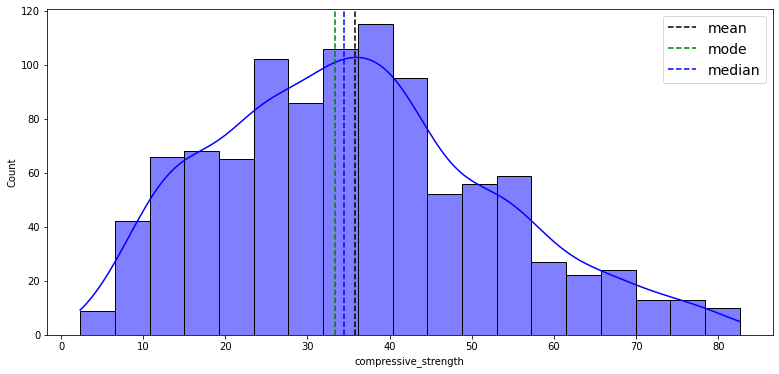

In [ ]:
histograma(data["compressive_strength"])

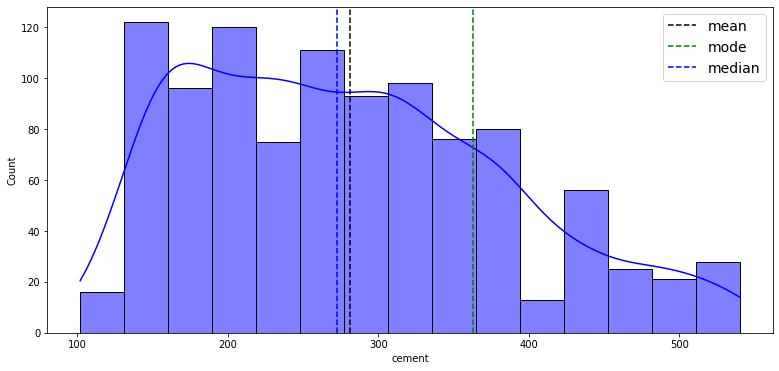

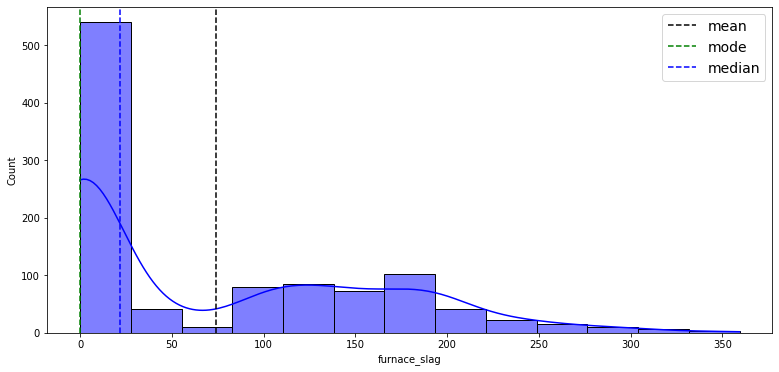

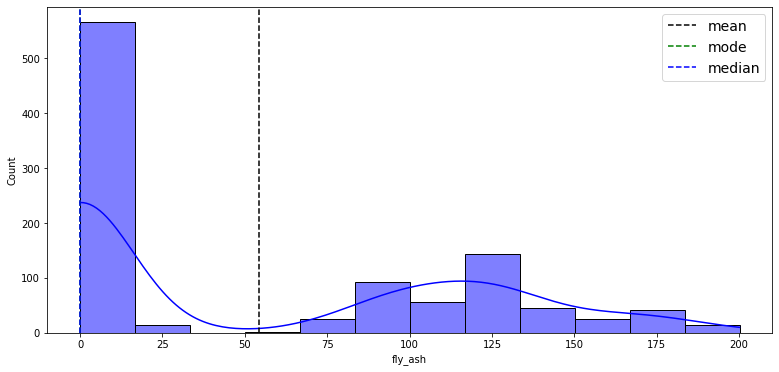

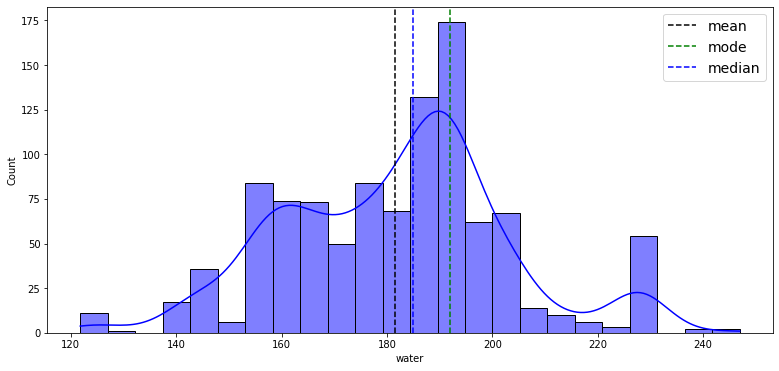

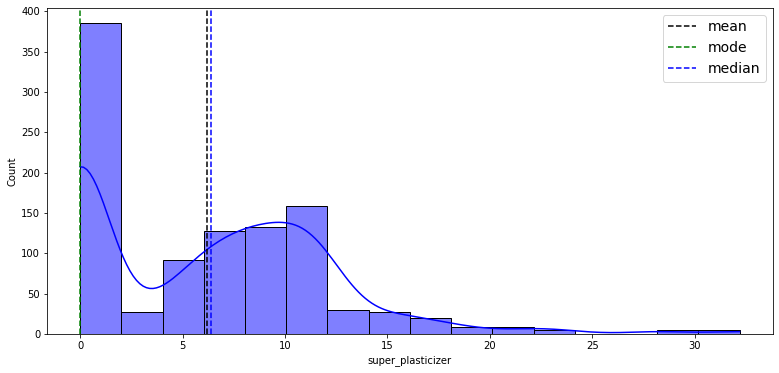

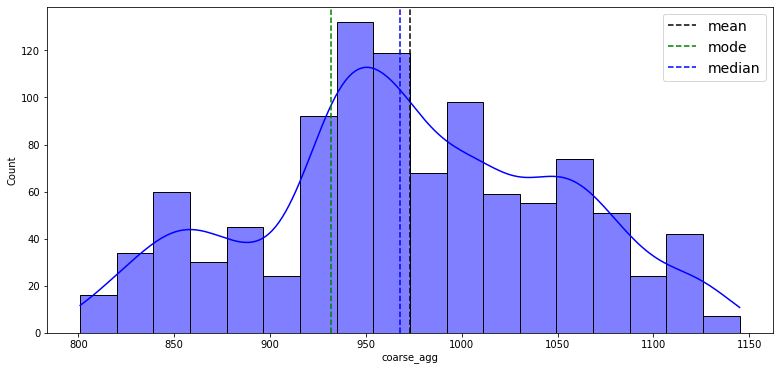

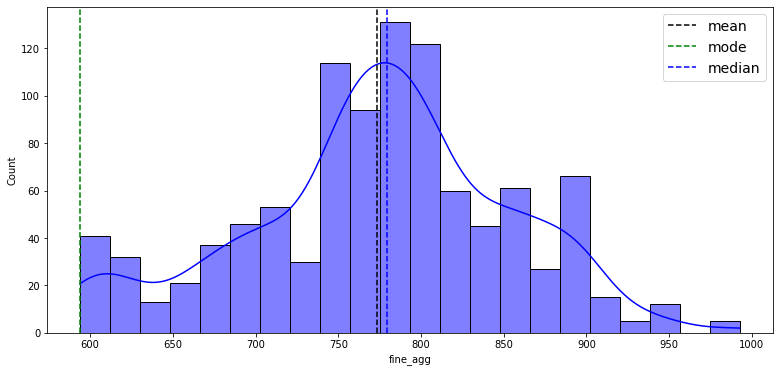

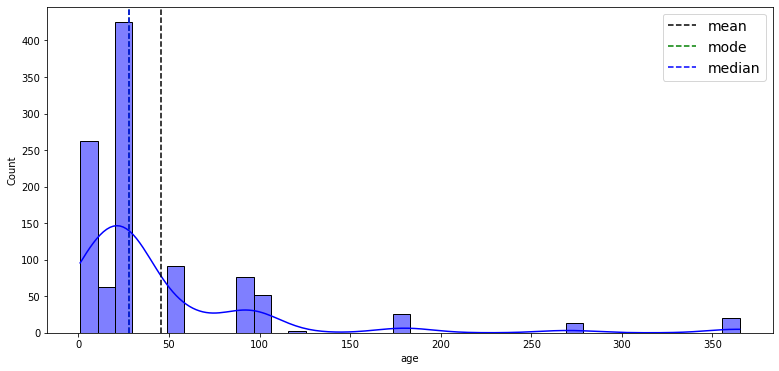

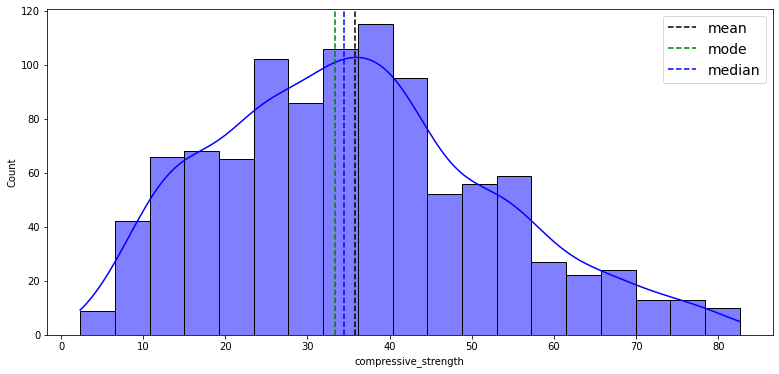

In [ ]:
for columna in data.columns:
    histograma(data[columna])

In [ ]:
data["compressive_strength"].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: compressive_strength, dtype: float64

In [ ]:
# normalización de la data
mu =  data["compressive_strength"].mean()
sigma = data["compressive_strength"].std()
normed_data=(data["compressive_strength"]-mu)/sigma
# se realiza la prueba
print(stats.kstest(normed_data,'norm'))

KstestResult(statistic=0.041276966404089455, pvalue=0.05814694952153987)


In [ ]:
# se obtienen las probabilidades
mu =  data["compressive_strength"].mean()
sigma = data["compressive_strength"].std()
a = 50
b = 70
x = stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma)
print(x)

0.17758753798548121


### Para practicar (exponer antes de finalizar la clase)

1. Realice una función que automatice la ejecución del test de normalidad, la función debe tener como entrada una serie de pandas

2. Tomando los datos de data["compressive_strength"] realice los siguientes cálculos:

        ¿cuál es la probabilidad de obtener una medida menor a 70?
        ¿cuál es la probabilidad de obtener una medida mayor a 60?
        ¿cuál es la probabilidad de obtener una medida entre 45 y 75?
        halle Z tal que P(x<Z)= 67%
        halle Z tal que P(30<x<Z)= 40%
        halle Z tal que P(40<x<Z)= 40%
        halle Z tal que P(5

```
# Esto tiene formato de código
```

0<x<Z)= 40%
        

In [ ]:
# Automatiza la test de normalidad
def normalidad(serie):
  # se obtienen las probabilidades
  mu =  serie.mean()
  sigma = serie.std()
  normed_data=(serie-mu)/sigma
  return stats.kstest(normed_data,'norm')
normalidad(data["compressive_strength"])

KstestResult(statistic=0.0413025521207398, pvalue=0.05789468341031342)

In [ ]:
# a) ¿cuál es la probabilidad de obtener una medida menor a 50?
mu =  data["compressive_strength"].mean()
sigma = data["compressive_strength"].std()
a=50
z=stats.norm.cdf(a,mu,sigma)
print(z)

0.8020434079014641


In [ ]:
# b)¿cuál es la probabilidad de obtener una medida mayor a 50?
z=1-stats.norm.cdf(a,mu,sigma)
print(z)

0.1979565920985359


In [ ]:
# c) cuál es la probabilidad de obtener una medida entre 35 y 45?
z= stats.norm.cdf(45,mu,sigma)-stats.norm.cdf(35,mu,sigma)
print(z)

0.22824060678738722


In [ ]:
# halle Z tal que P(x<Z)= 77%
p=0.77
z=stats.norm.ppf(p,mu,sigma)
print(z)

48.16077424796384


In [ ]:
#  halle Z tal que P(30<x<Z)= 30%
x=stats.norm.cdf(30,mu,sigma)+0.3

z=stats.norm.ppf(x,mu,sigma)
print(z)

42.88305517944564


Puede revisar el blog para observar ejemplo utilizando el teorema de bayes:
   
https://blog.findemor.es/2017/12/machine-learning-introduccion-estadistica-basica-python/